In [130]:
import pandas as pd 
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("Major_Crime.csv")

In [132]:
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384687 entries, 0 to 384686
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   X                  384687 non-null  float64            
 1   Y                  384687 non-null  float64            
 2   OBJECTID           384687 non-null  int64              
 3   EVENT_UNIQUE_ID    384687 non-null  object             
 4   REPORT_DATE        384687 non-null  object             
 5   OCC_DATE           384687 non-null  datetime64[ns, UTC]
 6   REPORT_YEAR        384687 non-null  int64              
 7   REPORT_MONTH       384687 non-null  object             
 8   REPORT_DAY         384687 non-null  int64              
 9   REPORT_DOY         384687 non-null  int64              
 10  REPORT_DOW         384687 non-null  object             
 11  REPORT_HOUR        384687 non-null  int64              
 12  OCC_YEAR           384566 non-

In [134]:
data = df[df['OCC_DATE'] >= '2019-01-01']


print("Filtered DataFrame with years from 2019 to 2024:")
data.head()

Filtered DataFrame with years from 2019 to 2024:


,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
171374,-8.847170e+06,5.414749e+06,171375,GO-20194402,2019/01/01 05:00:00+00,2019-01-01 05:00:00+00:00,2019,January,1,1,...,2120,200,B&E,Break and Enter,90,Junction Area,90,Junction Area (90),-79.475480,43.671520
171377,-8.833974e+06,5.429926e+06,171378,GO-20191968,2019/01/01 05:00:00+00,2019-01-01 05:00:00+00:00,2019,January,1,1,...,1610,180,Robbery - Swarming,Robbery,53,Henry Farm,53,Henry Farm (53),-79.356937,43.770053
171378,-8.827698e+06,5.417355e+06,171379,GO-2019751,2019/01/01 05:00:00+00,2019-01-01 05:00:00+00:00,2019,January,1,1,...,1410,100,Aggravated Assault,Assault,62,East End-Danforth,62,East End-Danforth (62),-79.300556,43.688447
171379,-8.821737e+06,5.431542e+06,171380,GO-20191398,2019/01/01 05:00:00+00,2019-01-01 05:00:00+00:00,2019,January,1,1,...,2135,210,Theft Of Motor Vehicle,Auto Theft,142,Woburn North,137,Woburn (137),-79.247015,43.780536
171381,-8.827847e+06,5.414458e+06,171382,GO-2019252,2019/01/01 05:00:00+00,2019-01-01 05:00:00+00:00,2019,January,1,1,...,2120,220,B&E W'Intent,Break and Enter,63,The Beaches,63,The Beaches (63),-79.301900,43.669627


In [135]:
# Filter data for dates from 2019 onwards
data = df[df['OCC_DATE'] >= '2019-01-01']

In [136]:
# Aggregate data by week intervals and count the number of occurrences for each interval
crime_counts_week = data.groupby(pd.Grouper(key='OCC_DATE', freq='W')).size().reset_index(name='count')
crime_counts_week.head()

,OCC_DATE,count
0,2019-01-06 00:00:00+00:00,746
1,2019-01-13 00:00:00+00:00,742
2,2019-01-20 00:00:00+00:00,678
3,2019-01-27 00:00:00+00:00,646
4,2019-02-03 00:00:00+00:00,696


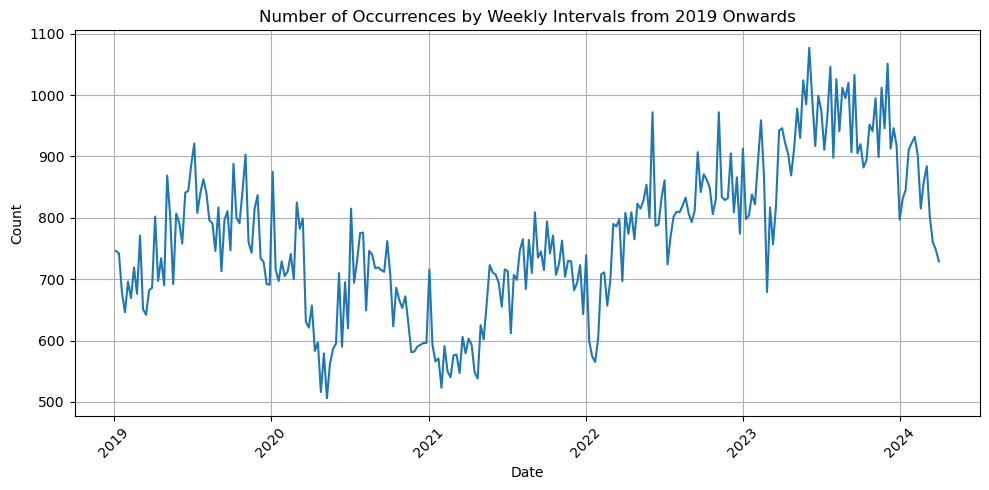

In [137]:
plt.figure(figsize=(10, 5))
plt.plot(crime_counts_week['OCC_DATE'], crime_counts_week['count'], linestyle='-')
plt.title('Number of Occurrences by Weekly Intervals from 2019 Onwards')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [138]:
# Sort the data by date in increasing order
weekly_counts = crime_counts_week.sort_values(by='OCC_DATE')
weekly_counts.head()

,OCC_DATE,count
0,2019-01-06 00:00:00+00:00,746
1,2019-01-13 00:00:00+00:00,742
2,2019-01-20 00:00:00+00:00,678
3,2019-01-27 00:00:00+00:00,646
4,2019-02-03 00:00:00+00:00,696


In [139]:
weekly_counts.set_index('OCC_DATE', inplace=True)
weekly_counts.head()

,count
OCC_DATE,
2019-01-06 00:00:00+00:00,746
2019-01-13 00:00:00+00:00,742
2019-01-20 00:00:00+00:00,678
2019-01-27 00:00:00+00:00,646
2019-02-03 00:00:00+00:00,696


In [140]:
train_data = weekly_counts[:'2022']
test_data = weekly_counts['2023':]
print("Training Data:",train_data.shape," ","Testing Data:" ,test_data.shape)

Training Data: (208, 1)   Testing Data: (66, 1)


In [141]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Fit the model on the training set
model = ExponentialSmoothing(train_data,seasonal='add', trend='add', seasonal_periods =52).fit()
# Forecast for the test period
pred = model.forecast(len(test_data) )# predicting for 2023-2024

C:\Users\mcsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


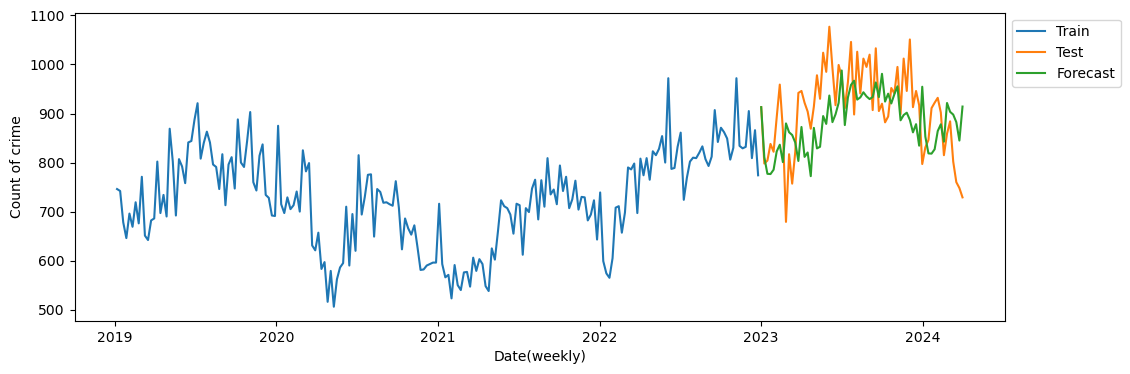

In [142]:
plt.figure(figsize=(12, 4))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred, label='Forecast')
#plt.title(f'Demand Forecast for {top_product} in {top_category_2019}')
plt.xlabel('Date(weekly)')
plt.ylabel('Count of crime')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()

In [143]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test_data, pred))
print(f'RMSE: {rmse}')

RMSE: 84.50608484263634


In [144]:
weekly_counts.head(10)

,count
OCC_DATE,
2019-01-06 00:00:00+00:00,746
2019-01-13 00:00:00+00:00,742
2019-01-20 00:00:00+00:00,678
2019-01-27 00:00:00+00:00,646
2019-02-03 00:00:00+00:00,696
2019-02-10 00:00:00+00:00,669
2019-02-17 00:00:00+00:00,719
2019-02-24 00:00:00+00:00,676
2019-03-03 00:00:00+00:00,771


In [145]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [146]:
test_result=adfuller(weekly_counts)

In [147]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [148]:
adfuller_test(weekly_counts)

ADF Test Statistic : -2.1602089298210783
p-value : 0.22100284176660362
#Lags Used : 3
Number of Observations Used : 270
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [149]:
weekly_counts['Seasonal First Difference']=weekly_counts['count']-weekly_counts['count'].shift(1)

In [150]:
weekly_counts.head(14)

,count,Seasonal First Difference
OCC_DATE,,
2019-01-06 00:00:00+00:00,746,NaN
2019-01-13 00:00:00+00:00,742,-4.0
2019-01-20 00:00:00+00:00,678,-64.0
2019-01-27 00:00:00+00:00,646,-32.0
2019-02-03 00:00:00+00:00,696,50.0
2019-02-10 00:00:00+00:00,669,-27.0
2019-02-17 00:00:00+00:00,719,50.0
2019-02-24 00:00:00+00:00,676,-43.0
2019-03-03 00:00:00+00:00,771,95.0


In [151]:
## Again test dickey fuller test
adfuller_test(weekly_counts['Seasonal First Difference'].dropna())

ADF Test Statistic : -13.777833062130732
p-value : 9.417431736133631e-26
#Lags Used : 2
Number of Observations Used : 270
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


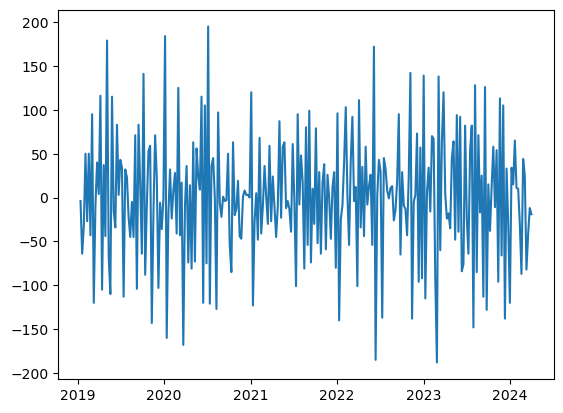

In [152]:
plt.plot(weekly_counts['Seasonal First Difference'])

C:\Users\mcsan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


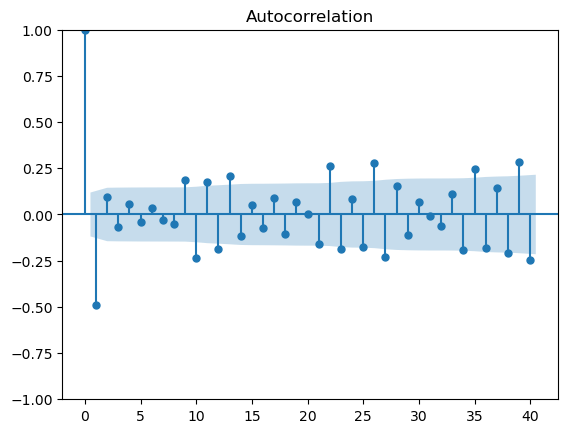

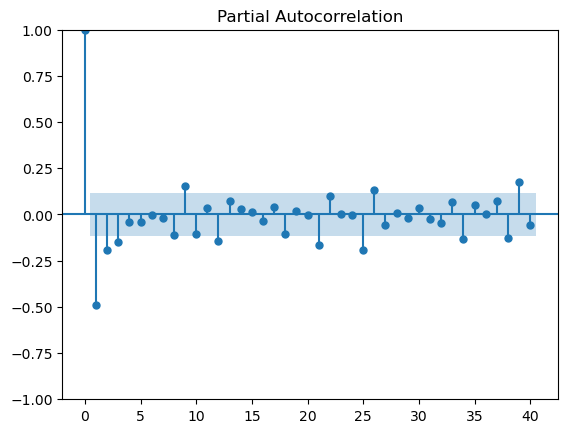

In [153]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(weekly_counts['Seasonal First Difference'].iloc[2:],lags=40);
plot_pacf(weekly_counts['Seasonal First Difference'].iloc[2:],lags=40);

In [154]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [155]:
model = ARIMA(weekly_counts['count'], order=(1,1,1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  274
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1502.922
Date:                Wed, 31 Jul 2024   AIC                           3011.844
Time:                        22:32:04   BIC                           3022.673
Sample:                    01-06-2019   HQIC                          3016.191
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1169      0.096     -1.222      0.222      -0.304       0.071
ma.L1         -0.5090      0.086     -5.921      0.000      -0.678      -0.341
sigma2      3537.2312    283.205     12.490      0.0

C:\Users\mcsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\mcsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\mcsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [156]:
pred_ARIMA =model_fit.predict(start=len(train_data),end= len(weekly_counts['count']),dynamic=True)


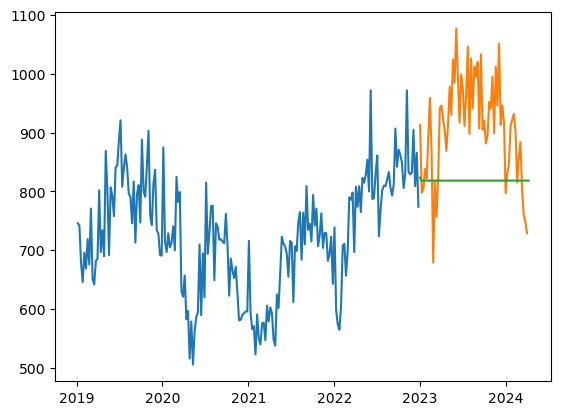

In [157]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(pred_ARIMA)

In [158]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(weekly_counts['count'],order=(1, 1, 1),seasonal_order=(1,1,0,48))
results=model.fit()

C:\Users\mcsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\mcsan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [159]:
pred_SARIMA=model_fit.predict(start=len(train_data),end= len(weekly_counts['count']),dynamic=True)

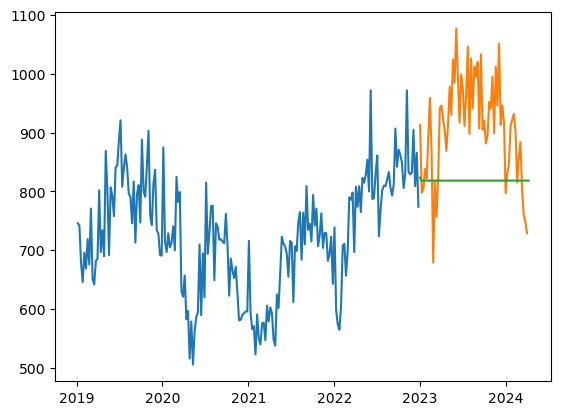

In [160]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(pred_SARIMA)

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns

<Figure size 1400x800 with 0 Axes>

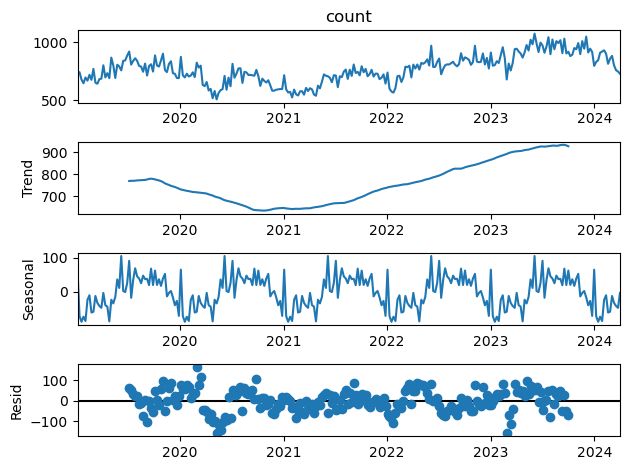

In [36]:
plt.figure(figsize=(14,8))
result = seasonal_decompose(weekly_counts['count'],model='additive')
result.plot();

* A12-month seasonal pattern is visible
* An downwards and upwards trend is evident

C:\Users\mcsan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


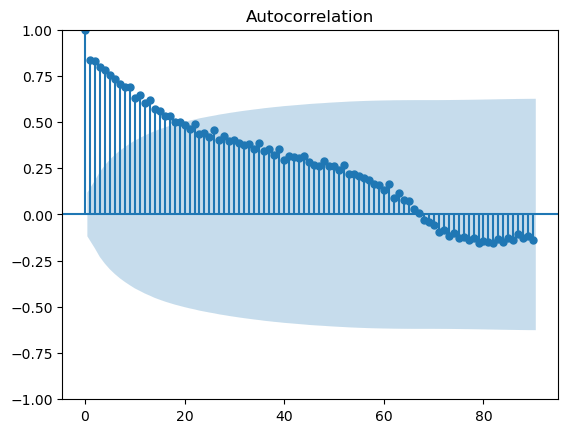

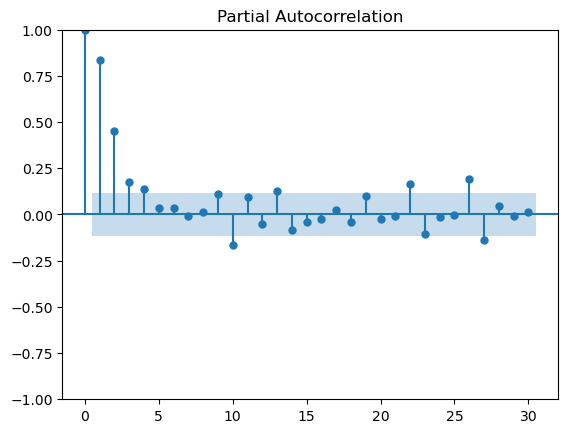

In [37]:
plot_acf(weekly_counts['count'], lags=90);
plot_pacf(weekly_counts['count'], lags=30);

## Random Forest Regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [42]:
#lag features and rolling mean features
for i in range(1, 13):  # Lag features for 12 previous weeks
    crime_counts_week[f'lag_{i}'] = crime_counts_week['count'].shift(i)
for window in [4, 8, 12]:  # Rolling mean features for 4, 8, and 12 weeks
    crime_counts_week[f'rolling_mean_{window}'] = crime_counts_week['count'].rolling(window=window).mean()

In [44]:
crime_counts_week = crime_counts_week.dropna() # drop any empty rows or missing values after above operations

In [45]:
# Train-test split
train_data = crime_counts_week[crime_counts_week['OCC_DATE'] < '2023-01-01']
test_data = crime_counts_week[crime_counts_week['OCC_DATE'] >= '2023-01-01']

X_train = train_data.drop(['OCC_DATE', 'count'], axis=1)
y_train = train_data['count']
X_test = test_data.drop(['OCC_DATE', 'count'], axis=1)
y_test = test_data['count']

In [46]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}') # Checking if any arrays are empty

X_train shape: (184, 15)
y_train shape: (184,)
X_test shape: (66, 15)
y_test shape: (66,)


In [47]:
#Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [48]:
# Predict and evaluate
pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
print(f'RMSE: {rmse_rf}')

RMSE: 76.0825420618804


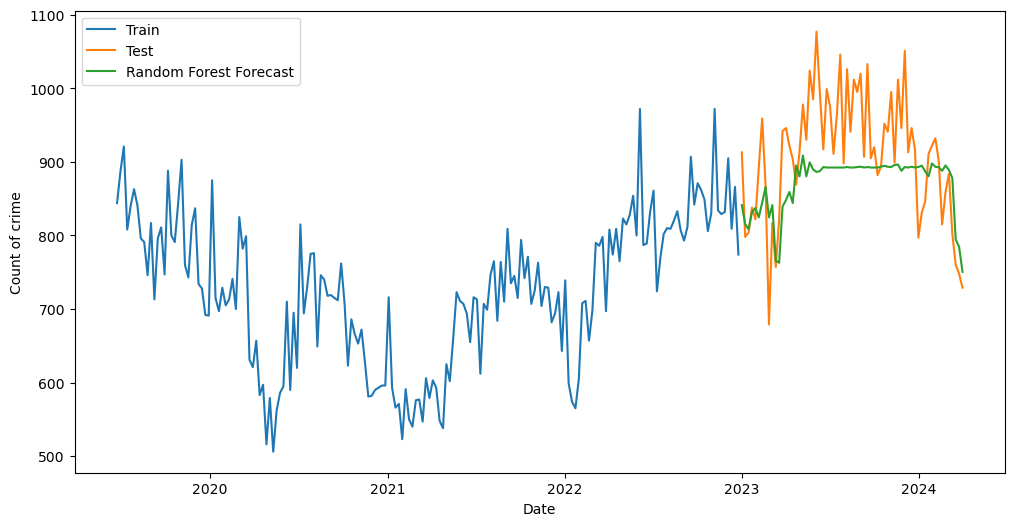

In [49]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['OCC_DATE'], y_train, label='Train')
plt.plot(test_data['OCC_DATE'], y_test, label='Test')
plt.plot(test_data['OCC_DATE'], pred_rf, label='Random Forest Forecast')
plt.xlabel('Date')
plt.ylabel('Count of crime')
plt.legend()
plt.show()


## LSTM

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, RMSprop

In [51]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
crime_counts_week['count'] = scaler.fit_transform(crime_counts_week[['count']])

In [52]:
# Create sequences for LSTM
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 12  # Number of lag weeks to use for prediction
crime_counts = crime_counts_week['count'].values.reshape(-1, 1)
X, y = create_sequences(crime_counts, time_steps)

In [53]:
# Train-test split
train_data = crime_counts_week[crime_counts_week['OCC_DATE'] < '2023-01-01']
test_data = crime_counts_week[crime_counts_week['OCC_DATE'] >= '2023-01-01']

X_train = train_data.drop(['OCC_DATE', 'count'], axis=1)
y_train = train_data['count']
X_test = test_data.drop(['OCC_DATE', 'count'], axis=1)
y_test = test_data['count']

In [54]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\mcsan\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

In [74]:
# Predict and evaluate
pred_lstm = model.predict(X_test)
pred_lstm_inv = scaler.inverse_transform(pred_lstm)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [75]:
# Convert y_test to NumPy array, reshape, and inverse transform
y_test_np = np.array(y_test)  # Convert to NumPy array
y_test_np = y_test_np.reshape(-1, 1)  # Reshape for scaler

In [83]:
# Inverse transform
y_test_inv = scaler.inverse_transform(y_test_np)

rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, pred_lstm_inv))
print(f'RMSE: {rmse_lstm}')

RMSE: 79.28045143513985


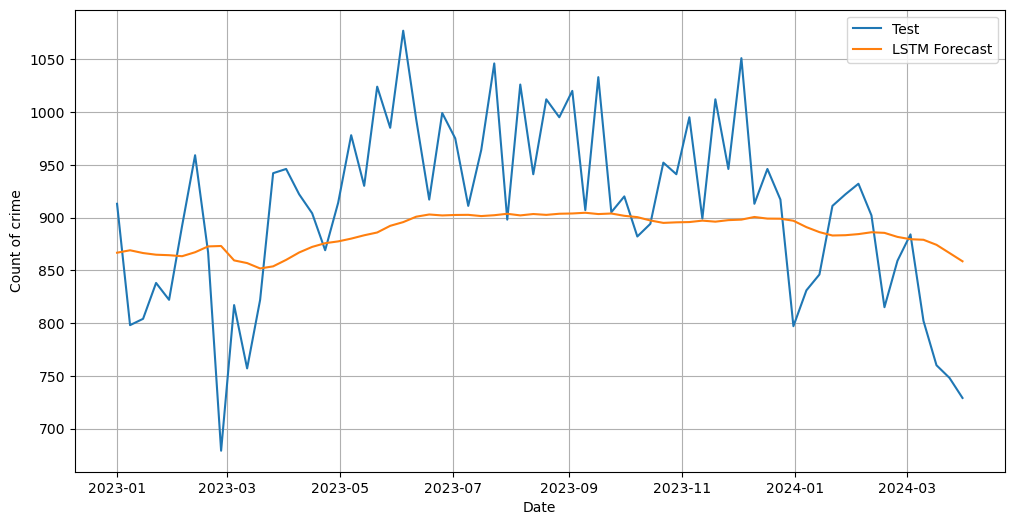

In [84]:
# Plot the results
test_dates = crime_counts_week['OCC_DATE'].values[-len(y_test):]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_inv, label='Test')
plt.plot(test_dates, pred_lstm_inv, label='LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Count of crime')
plt.legend()
plt.grid(True)
plt.show()

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [113]:
# Normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data['count'].values.reshape(-1, 1))
test_scaled = scaler.transform(test_data['count'].values.reshape(-1, 1))

In [114]:
# Prepare the data for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 4  # number of previous time steps to use as input variables
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

In [115]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], look_back, 1))
X_test = X_test.reshape((X_test.shape[0], look_back, 1))

In [116]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\mcsan\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [124]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

In [125]:
# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [126]:
# Invert predictions
train_predict_inv = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict_inv = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict_inv[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict_inv[:, 0]))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 0.09819230350365234
Test RMSE: 0.11873221230506616


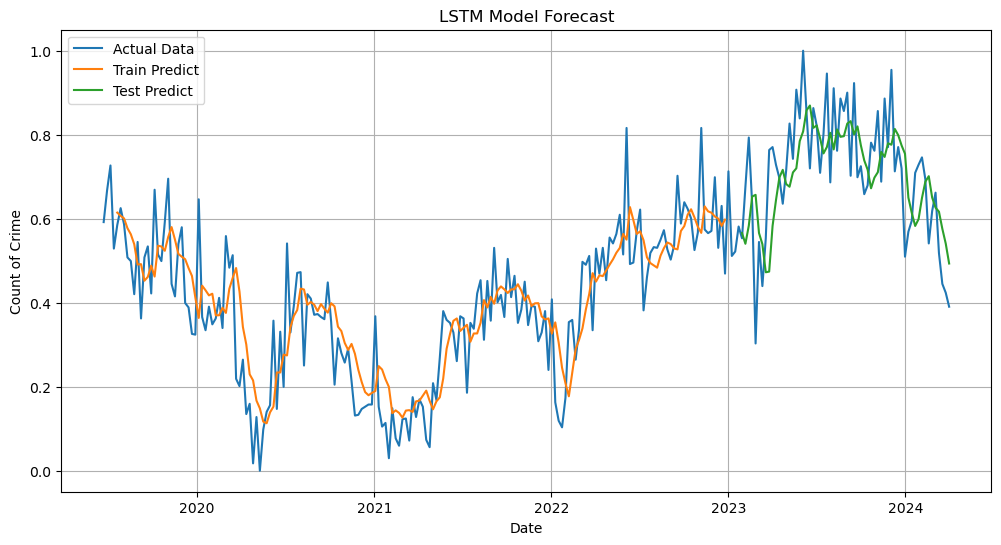

In [120]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(crime_counts_week['OCC_DATE'], crime_counts_week['count'], label='Actual Data')
plt.plot(train_data['OCC_DATE'][look_back:], train_predict, label='Train Predict')
plt.plot(test_data['OCC_DATE'][look_back:], test_predict, label='Test Predict')
plt.xlabel('Date')
plt.ylabel('Count of Crime')
plt.legend()
plt.title('LSTM Model Forecast')
plt.grid(True)
plt.show()

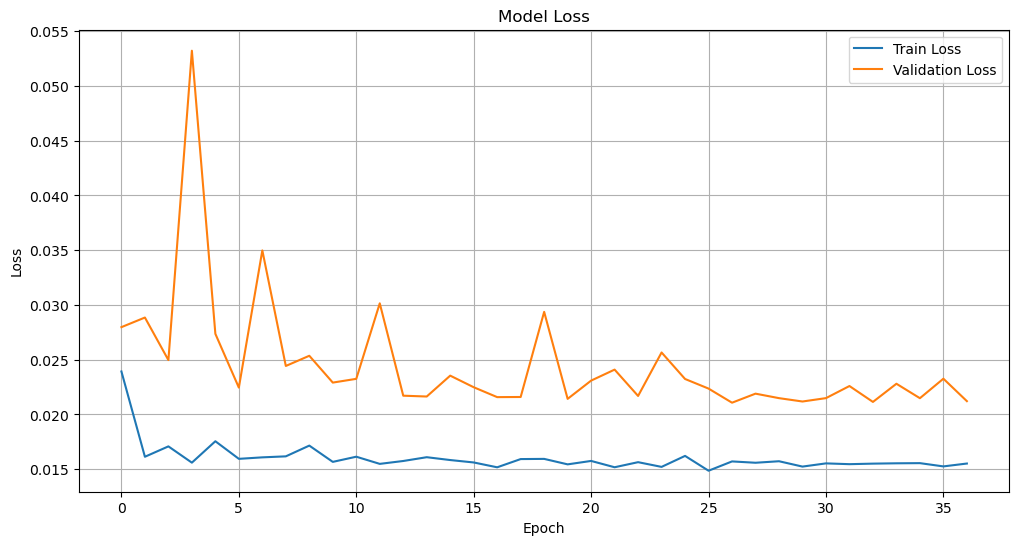

In [286]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.grid(True)
plt.show()

## Exponential Smoothing Forecast

In [103]:
# Scale the data
scaler = StandardScaler()
X_train = np.arange(len(train_data)).reshape(-1, 1)
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

y_train = train_data['count'].values
y_test = test_data['count'].values

In [104]:
# Reshape y_train and y_test to be 2D for scaling
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

In [105]:
# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train_reshaped).ravel()  # Flatten for Exponential Smoothing
y_test_scaled = scaler.transform(y_test_reshaped).ravel()  # Flatten for Exponential Smoothing

In [106]:
# Apply Exponential Smoothing
model = ExponentialSmoothing(y_train_scaled, seasonal='add', seasonal_periods=48)
model_fit = model.fit()

In [107]:
# Forecast
forecast_scaled = model_fit.forecast(len(y_test_scaled))
# Inverse transform the forecast and actual values
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

In [108]:
# Evaluate
es_rmse = np.sqrt(mean_squared_error(y_test_original, forecast))
print(f'Exponential Smoothing RMSE: {es_rmse}')

Exponential Smoothing RMSE: 0.1670232518188887


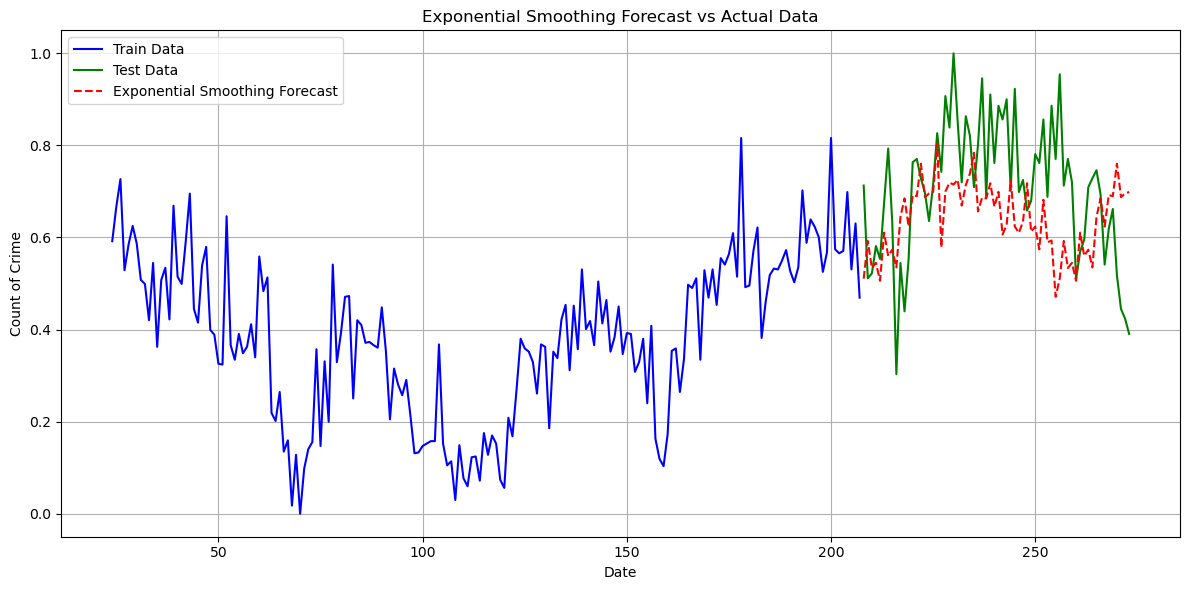

In [109]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['count'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['count'], label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='Exponential Smoothing Forecast', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Count of Crime')
plt.title('Exponential Smoothing Forecast vs Actual Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()